In [251]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pgrtk

In [252]:
## pgr-alnmap --preset overwrite --max-gap 600 KIR_all.fa ../KIR48JW_46_asm_ctg_m.000.fa test

In [271]:
ctgmap = json.load(open("test.ctgmap.json","r"))

In [272]:
query_length = dict( ( (_[1], _[2]) for _ in ctgmap["query_length"] ) )

In [273]:
ctgmap["records"][0]

{'t_name': '0000-cA01~tB01_GU182352.1/1201488',
 'ts': 113,
 'te': 4994,
 'q_name': 'KIR48JW_46_asm_ctg_m::ctg000017_P_6584_11534_0',
 'qs': 16,
 'qe': 4888,
 'ctg_len': 4950,
 'orientation': 0,
 'ctg_orientation': 0,
 't_dup': False,
 't_ovlp': False,
 'q_dup': False,
 'q_ovlp': False}

In [274]:
t_name_order = open("order.txt", "r").read().split()

In [275]:
query_count = {}
for record in ctgmap["records"]:
    t_name = record["t_name"]
    q_name = record["q_name"]
    query_count.setdefault(q_name, {})
    query_count[q_name].setdefault(t_name, 0)
    query_count[q_name][t_name] += record["qe"] - record["qs"]
    

KIR48JW_46_asm_ctg_m::ctg000001_P_419_46940_0 HG03579.maternal.f1_assembly_v2_genbank::HG03579#2#JAGYVT010000021.1_833327_1051428_1 0.9339653059908428
KIR48JW_46_asm_ctg_m::ctg000001_P_419_46940_0 HG01891.maternal.f1_assembly_v2_genbank::HG01891#2#JAGYVN010000087.1_298487_517256_0 0.9137593774854367
KIR48JW_46_asm_ctg_m::ctg000001_P_419_46940_0 HG01952.paternal.f1_assembly_v2_genbank::HG01952#1#JAHAME010000165.1_299456_517312_0 0.9339653059908428
KIR48JW_46_asm_ctg_m::ctg000001_P_419_46940_0 hg38_tagged::chr19_KI270886v1_alt_hg38_219_195848_1 0.9163388577201694
KIR48JW_46_asm_ctg_m::ctg000001_P_419_46940_0 HG02486.maternal.f1_assembly_v2_genbank::HG02486#2#JAGYVL010000159.1_298213_516337_0 0.9317082607854518
KIR48JW_46_asm_ctg_m::ctg000001_P_419_46940_0 HG02723.maternal.f1_assembly_v2_genbank::HG02723#2#JAHEOT010000088.1_37257031_37416820_0 0.9334279142752735
KIR48JW_46_asm_ctg_m::ctg000001_P_419_46940_0 HG00735.paternal.f1_assembly_v2_genbank::HG00735#1#JAHBCH010000073.1_17699834_1785

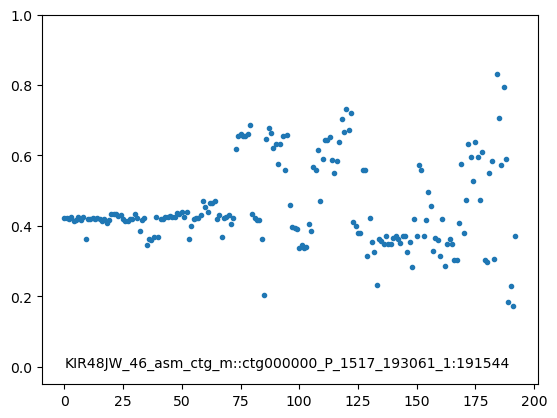

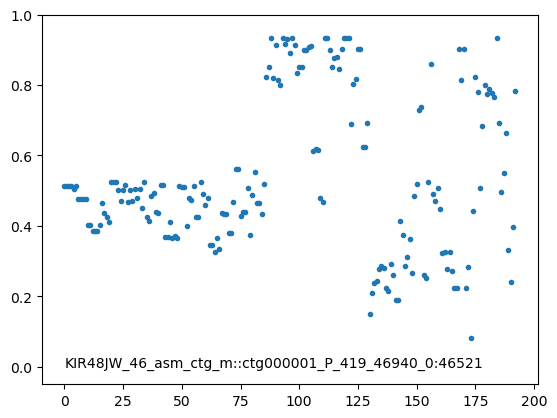

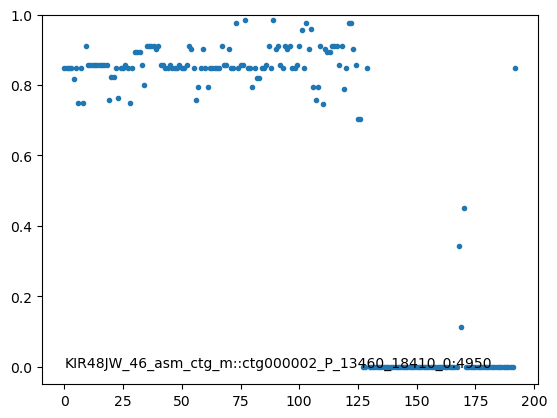

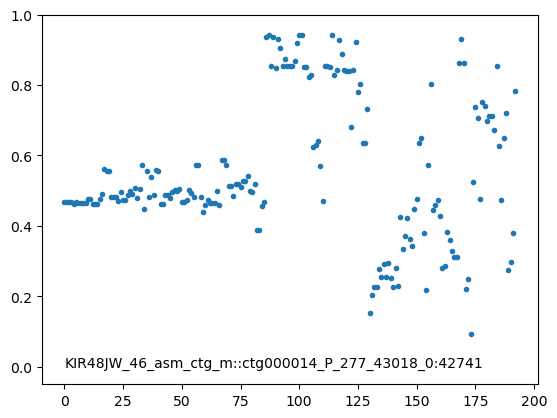

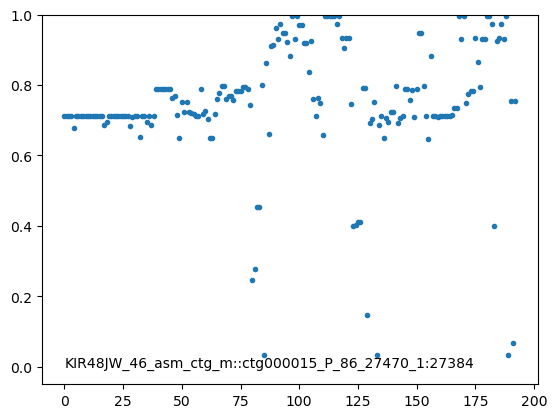

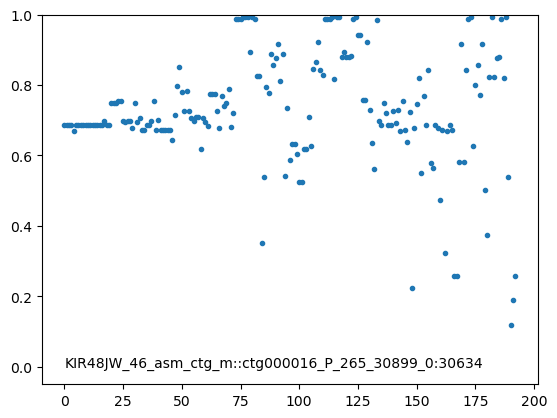

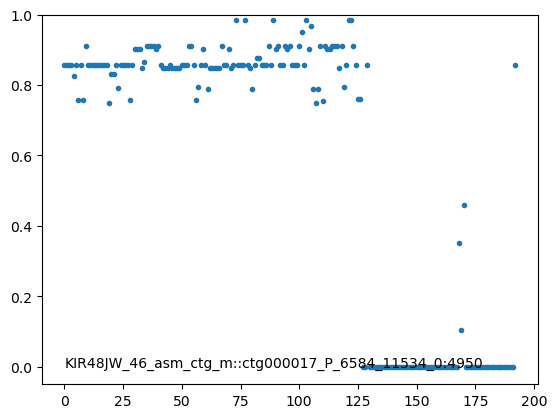

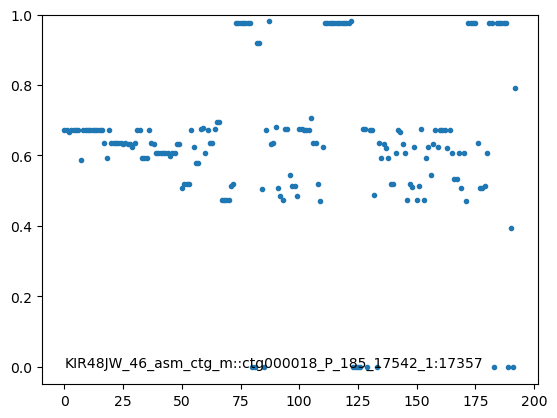

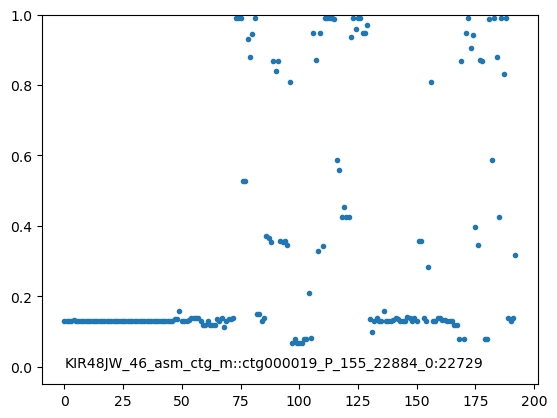

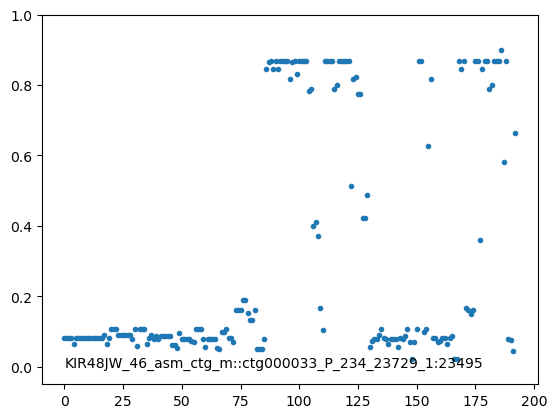

In [276]:
q_names = list(query_count.keys())
q_names.sort()
for q_name in q_names:
    y = []
    for t_name in t_name_order:
        if t_name in query_count[q_name]:
            y.append(query_count[q_name][t_name] /query_length[q_name])
            if query_count[q_name][t_name] /query_length[q_name] > 0.9:
                print(q_name, t_name, query_count[q_name][t_name] /query_length[q_name])
        else:
            y.append(0)
        #print(q_name, t_name, query_count[q_name][t_name] /query_length[q_name])
    plt.figure()
    plt.plot(y, ".")
    plt.ylim(-0.05, 1)
    plt.text(0, 0, "{}:{}".format(q_name,query_length[q_name]))

In [259]:
sdb = pgrtk.SeqIndexDB()

In [262]:
sdb.load_from_fastx("../assemble_results.fa")

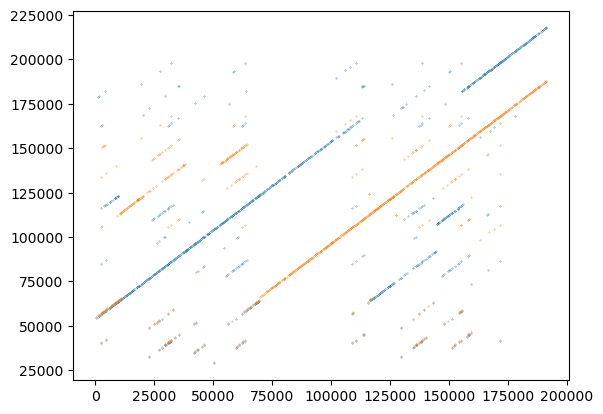

In [285]:
s1 = sdb.get_seq("../assemble_results.fa", "KIR48JW_46_asm_ctg_m::ctg000000_P_1517_193061_1")
s2 = sdb.get_seq("../assemble_results.fa", "HG03579.maternal.f1_assembly_v2_genbank::HG03579#2#JAGYVT010000021.1_833327_1051428_1")
s3 = sdb.get_seq("../assemble_results.fa", "HG01361.maternal.f1_assembly_v2_genbank::HG01361#2#JAGYYW010000161.1_835706_1023691_1")
x, y = pgrtk.get_shmmr_dots(s1, s2)
plt.plot(x, y, ".", markersize=0.5)
x, y = pgrtk.get_shmmr_dots(s1, s3)
plt.plot(x, y, ".", markersize=0.5)

In [183]:
## compute distance with bundle decomposition

In [288]:
bundle_info = {}
target_bundles = set()
with open("../assemble_results.bed") as f:
    for row in f:
        if row[0] == "#": 
            continue
        row = row.strip().split()
        ctg_name = row[0]
        ctg_s = int(row[1])
        ctg_e = int(row[2])

        bundle_id = int(row[3].split(":")[0])
        bundle_info.setdefault(ctg_name, [])
        bundle_info[ctg_name].append( (bundle_id, ctg_s, ctg_e) )
        if ctg_name.startswith("KIR48JW_46_asm_ctg_m"):
            target_bundles.add(bundle_id)
        
#target_ctg = "KIR48JW_46_asm_ctg_m::ctg000000_P_1517_193061_1"
#target_bundles = set( [_[0] for _ in bundle_info[target_ctg]] )
fout = open("../assemble_results_1.bed", "w")
with open("../assemble_results.bed") as f:
    for row in f:
        if row[0] == "#": 
            continue
        row = row.strip().split()
        bundle_id = int(row[3].split(":")[0])
        if bundle_id not in target_bundles:
            continue
        print(*row, sep="\t", file= fout)
fout.close()
        

In [287]:
!pwd

/KIR_hackathon/assembly_alnmap


In [60]:
ctg_names = list(bundle_info.keys())
ctg_id = dict( [ (_[1], _[0]) for _ in enumerate(ctg_names)])

In [157]:
dist_mat = np.zeros( (len(ctg_id), len(ctg_id))) 
for i in range(len(ctg_names)):
    for j in range(i, len(ctg_names)):
        if i == j:
            dist_mat[i,j] = 0.0
        else:
            c1 = ctg_names[i]
            c2 = ctg_names[j]
            bundle_info1 = bundle_info[c1]
            bundle_info2 = bundle_info[c2]
            bundle_set1 = set( [_[0] for _ in bundle_info1] )
            bundle_set2 = set( [_[0] for _ in bundle_info2] )
            share_set = bundle_set1.intersection(bundle_set2)
            share_length1 = 0
            length1 = 0
            for b_id, s, e in bundle_info1:
                if b_id in share_set:
                    share_length1 += e-s
                length1 += e-s
            
            share_length2 = 0
            length2 = 0
            for b_id, s, e in bundle_info2:
                if b_id in share_set:
                    share_length2 += e-s
                length2 += e-s
                
            d1 = 1.0-share_length1/length1 
            d2 = 1.0-share_length2/length2
            
            dist_mat[i,j] = max(d1, d2)
            dist_mat[j,i] = dist_mat[i,j]

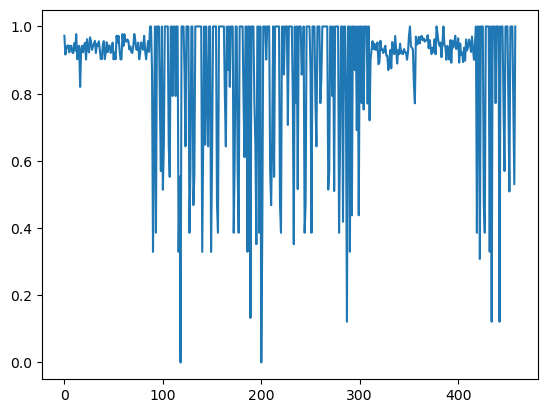

In [158]:
plt.plot(dist_mat[:,200])

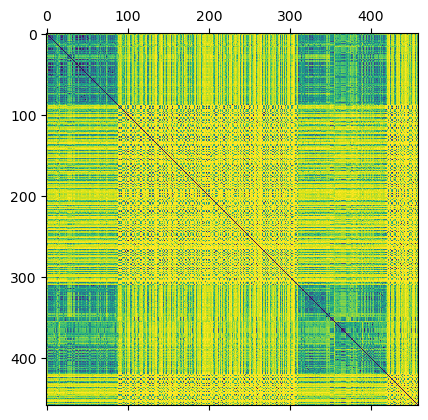

In [159]:
plt.matshow(dist_mat)

In [160]:
from scipy.cluster.hierarchy import ward, dendrogram

In [161]:
Z = ward(dist_mat)

/opt/conda/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


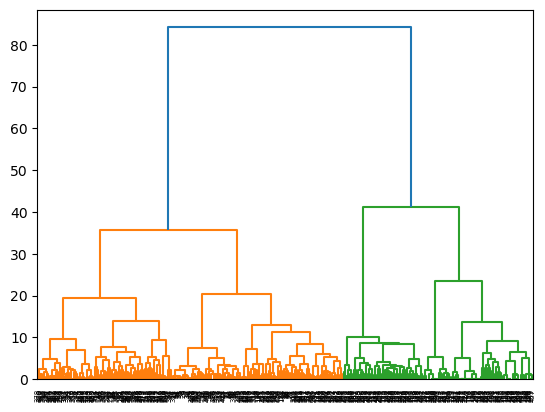

In [162]:
d=dendrogram(Z)

In [163]:
j = 0
f = open("annotation_order.txt", "w")
for i in d["leaves"]:
    j+=1
    print(j, i, ctg_names[i])
    print(ctg_names[i], ctg_names[i], file=f, sep="\t")
f.close()

1 378 cB02~tB01_MN167506/1150155
2 376 cB02~tB01_GU182355.1/1160947
3 400 hg38_tagged::chr19_KI270890v1_alt_hg38_592_176108_1
4 387 hg19_tagged::chr19_gl000209_random_hg19_1140_158998_0
5 389 hg38_tagged::chr19_GL000209v2_alt_hg38_227_168990_1
6 315 NA20129.maternal.f1_assembly_v2_genbank::NA20129#2#JAHEPD010000086.1_577749_765746_0
7 30 HG01258.paternal.f1_assembly_v2_genbank::HG01258#1#JAGYYV010000133.1_293973_481958_0
8 33 HG01361.maternal.f1_assembly_v2_genbank::HG01361#2#JAGYYW010000161.1_835706_1023691_1
9 26 HG01175.paternal.f1_assembly_v2_genbank::HG01175#1#JAHAMA010000152.1_834331_1021856_1
10 377 cB02~tB01_GU182359.1/1164419
11 404 hg38_tagged::chr19_KI270916v1_alt_hg38_344_176125_1
12 364 cB01~tB01_GU182339.1/1239295
13 366 cB01~tB01_KP420440.1/1217491
14 367 cB01~tB01_MN167515/1232508
15 392 hg38_tagged::chr19_KI270882v1_alt_hg38_732_240416_1
16 365 cB01~tB01_GU182347.1/1223161
17 408 hg38_tagged::chr19_KI270921v1_alt_hg38_5980_251269_0
18 369 cB01~tB01_MN167525/1236345
19 